In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/maningmn1987/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [55]:
flight_dframe = sns.load_dataset('flights')
type(flight_dframe)
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [62]:
flight_dframe.head()
aa = flight_dframe.ix[:,[0,1]]
aa.head()

,year,month
0,1949,January
1,1949,February
2,1949,March
3,1949,April
4,1949,May


In [72]:
flight_dframe = flight_dframe.pivot('month','year', 'passengers')

In [73]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [74]:
flight_dframe


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


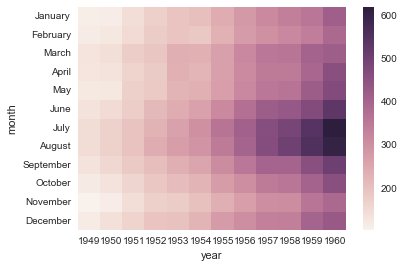

In [12]:
sns.heatmap(flight_dframe)

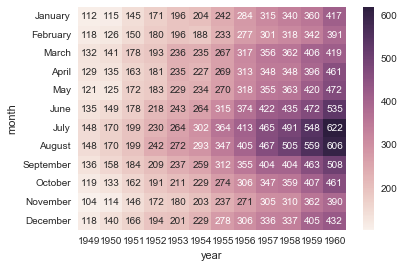

In [13]:
sns.heatmap(flight_dframe, annot = True, fmt = 'd')

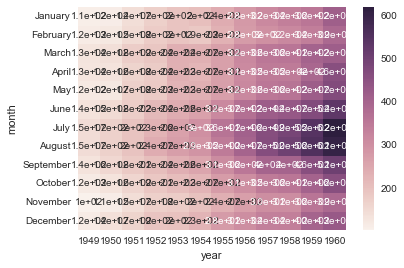

In [16]:
sns.heatmap(flight_dframe, annot = True)

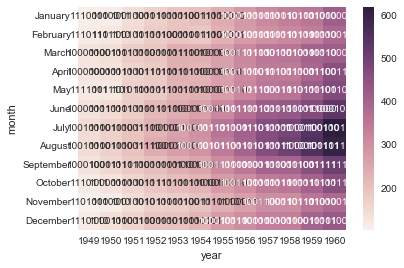

In [18]:
sns.heatmap(flight_dframe, annot = True, fmt = 'b')

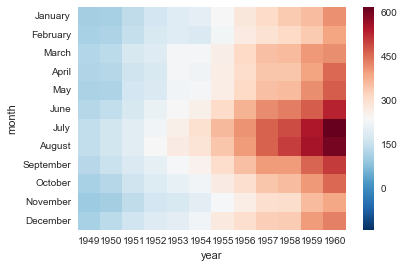

In [20]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['January',1955])

In [38]:
yearly_flights = flight_dframe.sum()
yearly_flights


year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [41]:
yearly_flights.index.values

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [37]:
pd.Series(yearly_flights.index.values)

0     1949
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
dtype: int64

In [42]:
pd.DataFrame(yearly_flights.index.values)

,0
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [46]:
flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)
flights

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [50]:
year_dframe = pd.concat((years, flights),axis = 1)
year_dframe
year_dframe.columns = ['Year','Flights']
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


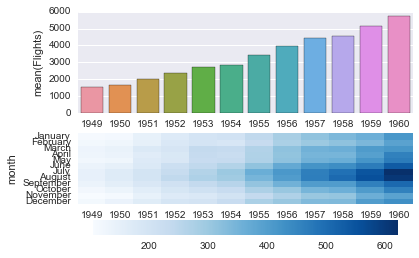

In [76]:
f, (axis1, axis2) = plt.subplots(2,1)
sns.barplot('Year', y = 'Flights',data = year_dframe, ax = axis1)

sns.heatmap(flight_dframe, cmap = 'Blues', ax = axis2, cbar_kws = {
        'orientation':'horizontal'
    })

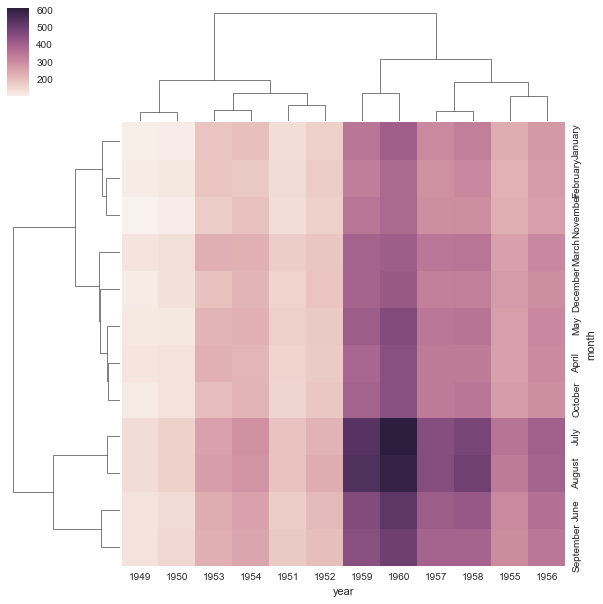

In [77]:
sns.clustermap(flight_dframe)

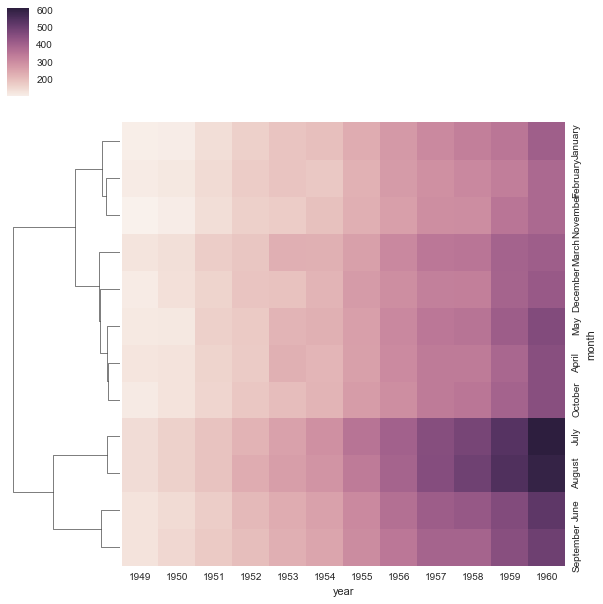

In [82]:
#flight is increasing each year, so standardize each year 
sns.clustermap(flight_dframe, col_cluster = False)

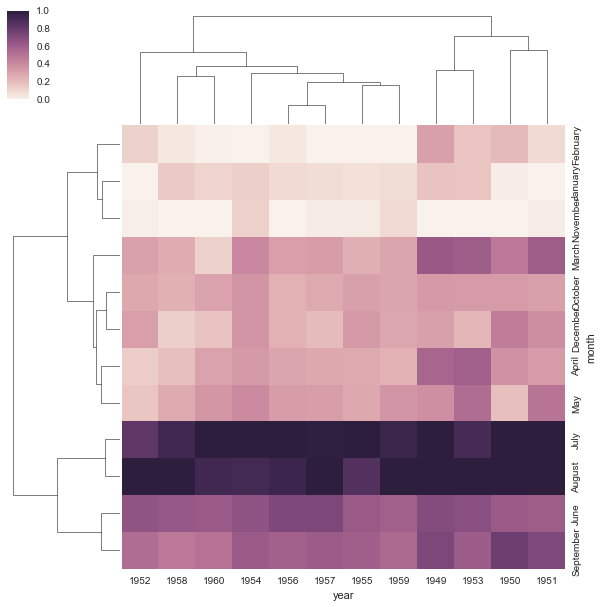

In [83]:

sns.clustermap(flight_dframe, standard_scale= 1)

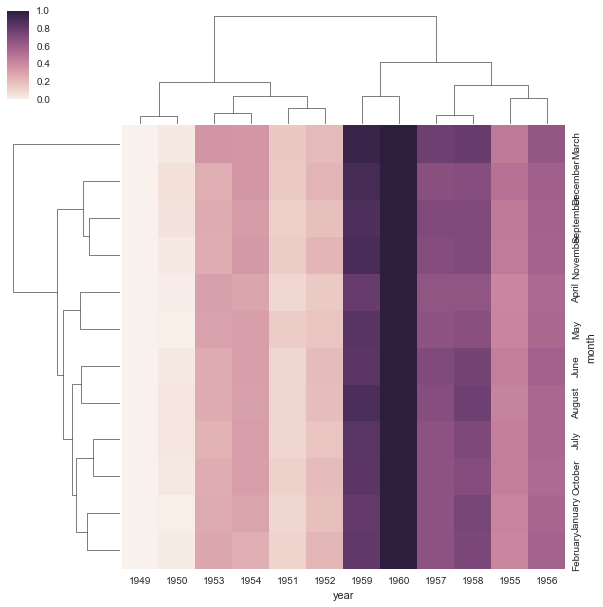

In [84]:
sns.clustermap(flight_dframe, standard_scale= 0)

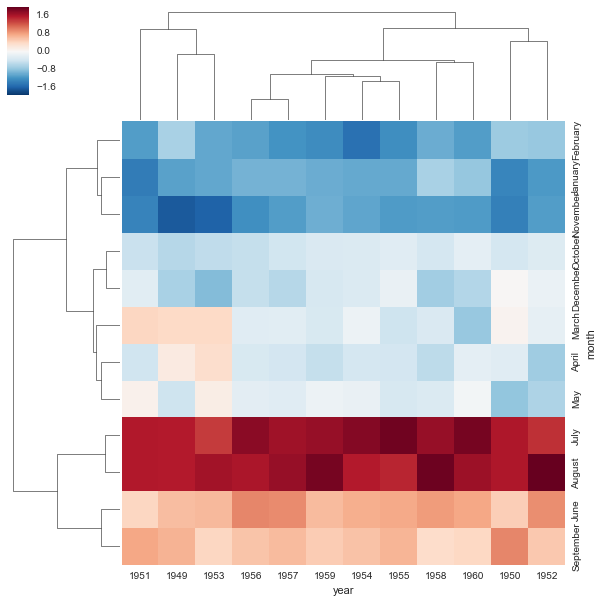

In [85]:
#zeros
#normalize along columns
sns.clustermap(flight_dframe, z_score = 1)